In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder

In [2]:
df = pd.read_csv("C:\\Users\\Mrinmoy\\Downloads\\Documents\\Australian Vehicle Prices.csv")
print(df.head())

           Brand    Year   Model               Car/Suv  \
0      Ssangyong  2022.0  Rexton  Sutherland Isuzu Ute   
1             MG  2022.0     MG3             Hatchback   
2            BMW  2022.0    430I                 Coupe   
3  Mercedes-Benz  2011.0    E500                 Coupe   
4        Renault  2022.0  Arkana                   SUV   

                                       Title UsedOrNew Transmission  \
0       2022 Ssangyong Rexton Ultimate (awd)      DEMO    Automatic   
1  2022 MG MG3 Auto Excite (with Navigation)      USED    Automatic   
2                      2022 BMW 430I M Sport      USED    Automatic   
3           2011 Mercedes-Benz E500 Elegance      USED    Automatic   
4                 2022 Renault Arkana Intens      USED    Automatic   

         Engine DriveType  FuelType FuelConsumption Kilometres   ColourExtInt  \
0  4 cyl, 2.2 L       AWD    Diesel  8.7 L / 100 km       5595  White / Black   
1  4 cyl, 1.5 L     Front   Premium  6.7 L / 100 km         16

# Inspecting Data


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16734 entries, 0 to 16733
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Brand              16733 non-null  object 
 1   Year               16733 non-null  float64
 2   Model              16733 non-null  object 
 3   Car/Suv            16706 non-null  object 
 4   Title              16733 non-null  object 
 5   UsedOrNew          16733 non-null  object 
 6   Transmission       16733 non-null  object 
 7   Engine             16733 non-null  object 
 8   DriveType          16733 non-null  object 
 9   FuelType           16733 non-null  object 
 10  FuelConsumption    16733 non-null  object 
 11  Kilometres         16733 non-null  object 
 12  ColourExtInt       16733 non-null  object 
 13  Location           16284 non-null  object 
 14  CylindersinEngine  16733 non-null  object 
 15  BodyType           16452 non-null  object 
 16  Doors              151

In [4]:
print(f"Shape: {df.shape}\n\nColumns: {list(df.columns)}")

Shape: (16734, 19)

Columns: ['Brand', 'Year', 'Model', 'Car/Suv', 'Title', 'UsedOrNew', 'Transmission', 'Engine', 'DriveType', 'FuelType', 'FuelConsumption', 'Kilometres', 'ColourExtInt', 'Location', 'CylindersinEngine', 'BodyType', 'Doors', 'Seats', 'Price']


In [5]:
# Dropping not important columns
df.drop(['Title','ColourExtInt','Location'],axis=1,inplace=True)

In [6]:
# missing values
df.isna().sum()

Brand                   1
Year                    1
Model                   1
Car/Suv                28
UsedOrNew               1
Transmission            1
Engine                  1
DriveType               1
FuelType                1
FuelConsumption         1
Kilometres              1
CylindersinEngine       1
BodyType              282
Doors                1604
Seats                1705
Price                   3
dtype: int64

In [18]:
# Inspect data with missing values
df[df.Price.isnull() == True]

,Brand,Year,Model,Car/Suv,UsedOrNew,Transmission,Engine,DriveType,FuelType,FuelConsumption,Kilometres,CylindersinEngine,BodyType,Doors,Seats,Price


In [19]:
# Since it is a relatively small amount, and we need prices to predict on, we'll drop these
df = df.dropna(subset=['Price'], axis=0)

In [20]:
df.head()

,Brand,Year,Model,Car/Suv,UsedOrNew,Transmission,Engine,DriveType,FuelType,FuelConsumption,Kilometres,CylindersinEngine,BodyType,Doors,Seats,Price
0,Ssangyong,2022.0,Rexton,Sutherland Isuzu Ute,DEMO,Automatic,"4 cyl, 2.2 L",AWD,Diesel,8.7 L / 100 km,5595,4 cyl,SUV,4 Doors,7 Seats,51990
1,MG,2022.0,MG3,Hatchback,USED,Automatic,"4 cyl, 1.5 L",Front,Premium,6.7 L / 100 km,16,4 cyl,Hatchback,5 Doors,5 Seats,19990
2,BMW,2022.0,430I,Coupe,USED,Automatic,"4 cyl, 2 L",Rear,Premium,6.6 L / 100 km,8472,4 cyl,Coupe,2 Doors,4 Seats,108988
3,Mercedes-Benz,2011.0,E500,Coupe,USED,Automatic,"8 cyl, 5.5 L",Rear,Premium,11 L / 100 km,136517,8 cyl,Coupe,2 Doors,4 Seats,32990
4,Renault,2022.0,Arkana,SUV,USED,Automatic,"4 cyl, 1.3 L",Front,Unleaded,6 L / 100 km,1035,4 cyl,SUV,4 Doors,5 Seats,34990


In [21]:
# Check number of unique values for each feature
df[df.columns].nunique()

Brand                   76
Year                    45
Model                  781
Car/Suv                618
UsedOrNew                3
Transmission             3
Engine                 106
DriveType                5
FuelType                 9
FuelConsumption        157
Kilometres           14261
CylindersinEngine       11
BodyType                10
Doors                   13
Seats                   13
Price                 3794
dtype: int64

In [22]:
# Sum up missing
df.isna().sum()

Brand                   0
Year                    0
Model                   0
Car/Suv                27
UsedOrNew               0
Transmission            0
Engine                  0
DriveType               0
FuelType                0
FuelConsumption         0
Kilometres              0
CylindersinEngine       0
BodyType              281
Doors                1602
Seats                1703
Price                   0
dtype: int64

# visualization

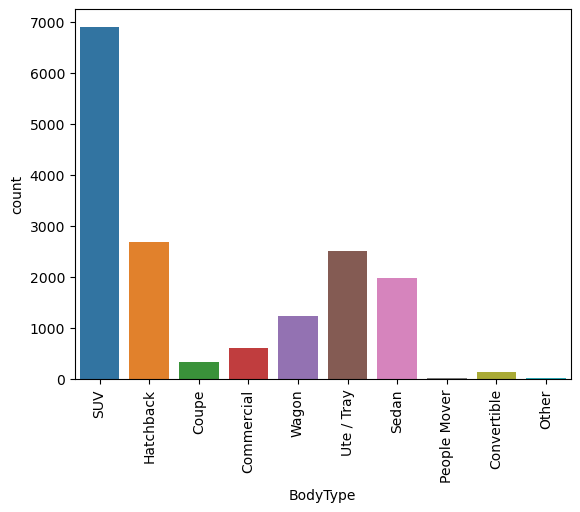

In [12]:
sns.countplot(x=df['BodyType'])
plt.xticks(rotation=90)
plt.show()

<Axes: xlabel='DriveType', ylabel='count'>

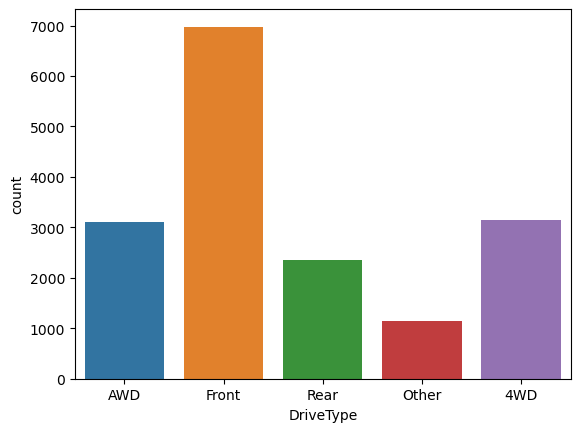

In [13]:
sns.countplot(x=df['DriveType'])

Brand
Toyota           2784
Hyundai          1239
Mazda            1179
Holden           1087
Ford             1055
Mitsubishi       1038
Nissan           1032
Volkswagen        891
Kia               809
Mercedes-Benz     623
Subaru            567
BMW               478
Audi              459
Honda             365
Jeep              320
Name: count, dtype: int64


<Axes: xlabel='Brand'>

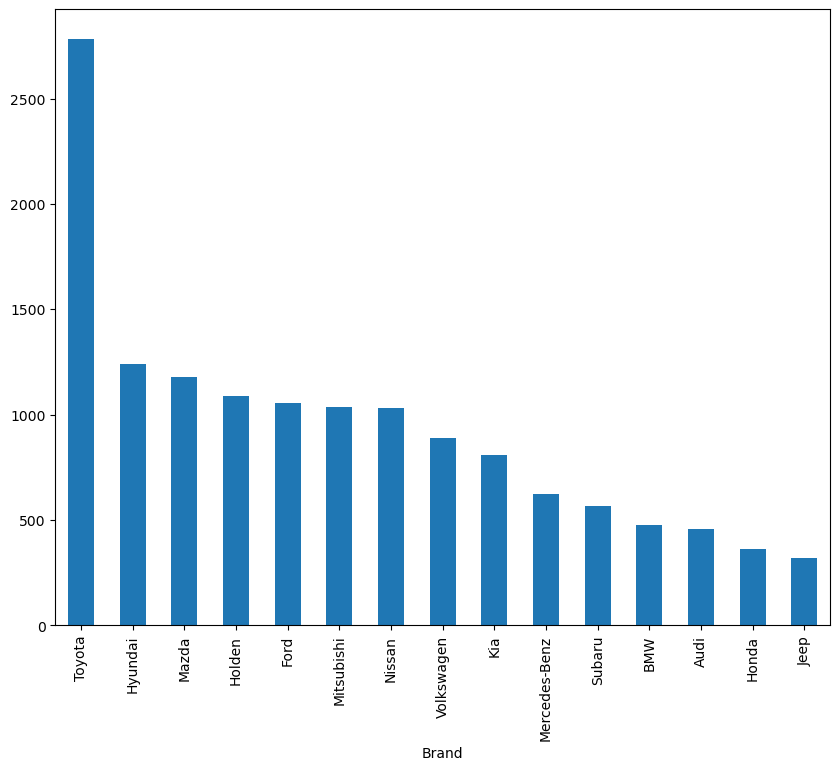

In [14]:
Top_brands = df.Brand.value_counts(ascending=False).head(15)
print(Top_brands)
df.Brand.value_counts().head(15).plot(kind='bar',figsize=(10,8))

In [15]:
df.Transmission.unique()

array(['Automatic', 'Manual', '-'], dtype=object)

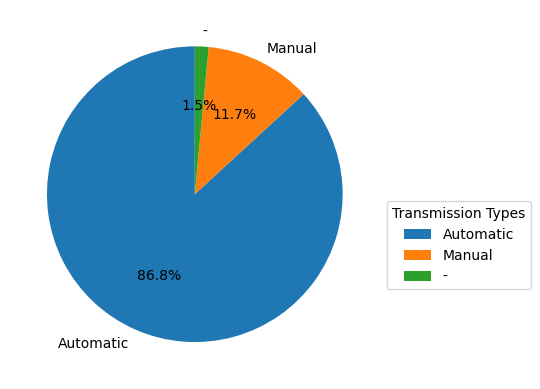

In [16]:
transmission_counts = df['Transmission'].value_counts()
plt.pie(transmission_counts, labels=transmission_counts.index, autopct='%1.1f%%', startangle=90)
plt.legend(title="Transmission Types", loc="upper left", bbox_to_anchor=(1, 0.5))
plt.show()

# Data Processing


In [23]:
# let's figure out a good value to set the seats value on records with the value missing
total = 0
max_seats = 0
min_seats = 100000
seats_with_values = df[df.Seats.isna() == False]
seats_without_values = df[df.Seats.isna() == True]

for seats in seats_with_values.Seats:
    total += float(seats.split()[0])
    max_seats = max(max_seats, float(seats.split()[0]))
    min_seats = min(min_seats, float(seats.split()[0]))
    
mean = total / len(df[df.Seats.isna() == False])

print(f"Total of records with seat values {len(seats_with_values):,}")
print(f"Total of records with NO seat values: {len(seats_without_values):,}")
print(f"\nMax Seats: {max_seats}\nMin Seats: {min_seats}\nMean Seats: {mean:.1f}")

Total of records with seat values 15,028
Total of records with NO seat values: 1,703

Max Seats: 22.0
Min Seats: 2.0
Mean Seats: 5.1


In [24]:
# Mean looks good to me to fill our missing value in with
df.Seats.fillna(f' {round(mean)} Seats',inplace=True)

In [25]:
# Lets see where we are at..
df.isna().sum()

Brand                   0
Year                    0
Model                   0
Car/Suv                27
UsedOrNew               0
Transmission            0
Engine                  0
DriveType               0
FuelType                0
FuelConsumption         0
Kilometres              0
CylindersinEngine       0
BodyType              281
Doors                1602
Seats                   0
Price                   0
dtype: int64

In [26]:
# Now lets figure out what we can do for records with missing door values.
df[df.Doors.isna() == False].head()

,Brand,Year,Model,Car/Suv,UsedOrNew,Transmission,Engine,DriveType,FuelType,FuelConsumption,Kilometres,CylindersinEngine,BodyType,Doors,Seats,Price
0,Ssangyong,2022.0,Rexton,Sutherland Isuzu Ute,DEMO,Automatic,"4 cyl, 2.2 L",AWD,Diesel,8.7 L / 100 km,5595,4 cyl,SUV,4 Doors,7 Seats,51990
1,MG,2022.0,MG3,Hatchback,USED,Automatic,"4 cyl, 1.5 L",Front,Premium,6.7 L / 100 km,16,4 cyl,Hatchback,5 Doors,5 Seats,19990
2,BMW,2022.0,430I,Coupe,USED,Automatic,"4 cyl, 2 L",Rear,Premium,6.6 L / 100 km,8472,4 cyl,Coupe,2 Doors,4 Seats,108988
3,Mercedes-Benz,2011.0,E500,Coupe,USED,Automatic,"8 cyl, 5.5 L",Rear,Premium,11 L / 100 km,136517,8 cyl,Coupe,2 Doors,4 Seats,32990
4,Renault,2022.0,Arkana,SUV,USED,Automatic,"4 cyl, 1.3 L",Front,Unleaded,6 L / 100 km,1035,4 cyl,SUV,4 Doors,5 Seats,34990


In [27]:
# let's figure out a good value to set the doors value on records with the value missing
total = 0
max_doors = 0
min_doors = 100000
doors_with_values = df[df.Doors.isna() == False]
doors_without_values = df[df.Doors.isna() == True]

for doors in doors_with_values.Doors:
    total += float(doors.split()[0])
    max_doors = max(max_doors, float(doors.split()[0]))
    min_doors = min(min_doors, float(doors.split()[0]))
    
mean = total / len(df[df.Doors.isna() == False])

print(f"Total of records with Door values {len(seats_with_values):,}")
print(f"Total of records with NO door values: {len(seats_without_values):,}")
print(f"\nMax Doors: {max_seats}\nMin Doors: {min_seats}\nMean Doors: {mean:.1f}")

Total of records with Door values 15,028
Total of records with NO door values: 1,703

Max Doors: 22.0
Min Doors: 2.0
Mean Doors: 4.0


In [28]:
# Sweet, we'll mean looks good to me again, we'll use that.
df.Doors.fillna(f' {round(mean)} Doors',inplace=True)

In [29]:
# See where we are
df.isna().sum()

Brand                  0
Year                   0
Model                  0
Car/Suv               27
UsedOrNew              0
Transmission           0
Engine                 0
DriveType              0
FuelType               0
FuelConsumption        0
Kilometres             0
CylindersinEngine      0
BodyType             281
Doors                  0
Seats                  0
Price                  0
dtype: int64

In [30]:
# Seems like a relatively small number, we can probably get away with dropping these
df = df.dropna(subset=['Car/Suv'],axis=0)

In [31]:
# Seems like a relatively small number, we can probably get away with dropping these
df = df.dropna(subset=['BodyType'],axis=0)

In [32]:
# See where we are
df.isna().sum()

Brand                0
Year                 0
Model                0
Car/Suv              0
UsedOrNew            0
Transmission         0
Engine               0
DriveType            0
FuelType             0
FuelConsumption      0
Kilometres           0
CylindersinEngine    0
BodyType             0
Doors                0
Seats                0
Price                0
dtype: int64

In [33]:
# Lets see the state of our types
df.dtypes

Brand                 object
Year                 float64
Model                 object
Car/Suv               object
UsedOrNew             object
Transmission          object
Engine                object
DriveType             object
FuelType              object
FuelConsumption       object
Kilometres            object
CylindersinEngine     object
BodyType              object
Doors                 object
Seats                 object
Price                 object
dtype: object

In [34]:
# Now lets turn Doors, Seats, CylindersinEngine and Fuel Consumption into proper numbers to be coerced into a float for later
df.Seats = df.Seats.apply(lambda x: x.split()[0])
df.Doors = df.Doors.apply(lambda x: x.split()[0])
df.FuelConsumption = df.FuelConsumption.apply(lambda x: x.split()[0])
df.CylindersinEngine = df.CylindersinEngine.apply(lambda x: x.split()[0])

In [35]:
# Lets see if there is any visble damage
df.head()

,Brand,Year,Model,Car/Suv,UsedOrNew,Transmission,Engine,DriveType,FuelType,FuelConsumption,Kilometres,CylindersinEngine,BodyType,Doors,Seats,Price
0,Ssangyong,2022.0,Rexton,Sutherland Isuzu Ute,DEMO,Automatic,"4 cyl, 2.2 L",AWD,Diesel,8.7,5595,4,SUV,4,7,51990
1,MG,2022.0,MG3,Hatchback,USED,Automatic,"4 cyl, 1.5 L",Front,Premium,6.7,16,4,Hatchback,5,5,19990
2,BMW,2022.0,430I,Coupe,USED,Automatic,"4 cyl, 2 L",Rear,Premium,6.6,8472,4,Coupe,2,4,108988
3,Mercedes-Benz,2011.0,E500,Coupe,USED,Automatic,"8 cyl, 5.5 L",Rear,Premium,11,136517,8,Coupe,2,4,32990
4,Renault,2022.0,Arkana,SUV,USED,Automatic,"4 cyl, 1.3 L",Front,Unleaded,6,1035,4,SUV,4,5,34990


In [36]:
# It appears we have some non-numeric based values these will get forced to NaN
df[df.FuelConsumption == '-']

,Brand,Year,Model,Car/Suv,UsedOrNew,Transmission,Engine,DriveType,FuelType,FuelConsumption,Kilometres,CylindersinEngine,BodyType,Doors,Seats,Price
5,Toyota,2004.0,Estima,ON FOUR WHEELS,USED,Automatic,-,Other,Unleaded,-,160230,-,Commercial,4,5,9990
10,Toyota,2009.0,HiAce,Carbarn,USED,Automatic,-,Other,Unleaded,-,148190,-,Commercial,4,5,42500
17,Mitsubishi,2013.0,Outlander,Exclusive Autohaus,USED,Manual,-,Other,-,-,120020,-,Wagon,4,5,13999
32,Volkswagen,2023.0,T-Cross,NEW In stock,NEW,Automatic,-,Front,Premium,-,15,-,Wagon,4,5,35887
38,Jeep,2012.0,Grand,Mr Car,USED,Automatic,-,Other,Unleaded,-,224839,-,Wagon,4,5,13999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16706,Mercedes-Benz,2016.0,Sprinter,Australian Vehicle Locators,USED,Automatic,-,Rear,Diesel,-,186856,-,Commercial,4,5,39950
16708,Nissan,2008.0,Elgrand,Motorman Imports,USED,Automatic,-,Other,Unleaded,-,97000,-,Wagon,4,5,18000
16723,Suzuki,2022.0,Swift,NEW In stock,NEW,Automatic,-,Front,Unleaded,-,20,-,Hatchback,4,5,28590
16726,Toyota,2011.0,Estima,Topcar Rez,USED,Automatic,-,Front,Unleaded,-,97000,-,Wagon,7,5,21989


In [37]:
# try and force values to numeric, if we can
cols=['Seats',
      'Doors',
      'FuelConsumption',
      'CylindersinEngine',
      'Kilometres',
      'Price']
for col in cols:
  df[col]= pd.to_numeric(df[col], errors='coerce')

In [38]:
# Cast columns as ideal types
df.FuelConsumption = df.FuelConsumption.astype(float)
df.CylindersinEngine = df.CylindersinEngine.astype(float)
df.Doors = df.Doors.astype(float)
df.Seats = df.Seats.astype(float)

In [39]:
# Lets see the state of our types
df.dtypes

Brand                 object
Year                 float64
Model                 object
Car/Suv               object
UsedOrNew             object
Transmission          object
Engine                object
DriveType             object
FuelType              object
FuelConsumption      float64
Kilometres           float64
CylindersinEngine    float64
BodyType              object
Doors                float64
Seats                float64
Price                float64
dtype: object

In [40]:
# Sum up missing
df.isna().sum()

Brand                   0
Year                    0
Model                   0
Car/Suv                 0
UsedOrNew               0
Transmission            0
Engine                  0
DriveType               0
FuelType                0
FuelConsumption      1415
Kilometres            566
CylindersinEngine    1392
BodyType                0
Doors                   0
Seats                   0
Price                  48
dtype: int64

In [41]:
# We can drop the records with that price was unable to be converted (non numberic based original value)
df = df.dropna(subset=['Price'], axis=0)

In [42]:
# Lets see what columns have missing values
missing_columns = df.columns[df.isnull().sum() > 0]
missing_columns

Index(['FuelConsumption', 'Kilometres', 'CylindersinEngine'], dtype='object')

In [43]:
# We will create new columns in the dataset
# letting our algorthm know that the record had this value missing before we filled it
for col in missing_columns:
    missing_indicator = f'{col}_missing'
    df[missing_indicator] = df[col].isnull().astype(float)

In [44]:
df.head(10)

,Brand,Year,Model,Car/Suv,UsedOrNew,Transmission,Engine,DriveType,FuelType,FuelConsumption,Kilometres,CylindersinEngine,BodyType,Doors,Seats,Price,FuelConsumption_missing,Kilometres_missing,CylindersinEngine_missing
0,Ssangyong,2022.0,Rexton,Sutherland Isuzu Ute,DEMO,Automatic,"4 cyl, 2.2 L",AWD,Diesel,8.7,5595.0,4.0,SUV,4.0,7.0,51990.0,0.0,0.0,0.0
1,MG,2022.0,MG3,Hatchback,USED,Automatic,"4 cyl, 1.5 L",Front,Premium,6.7,16.0,4.0,Hatchback,5.0,5.0,19990.0,0.0,0.0,0.0
2,BMW,2022.0,430I,Coupe,USED,Automatic,"4 cyl, 2 L",Rear,Premium,6.6,8472.0,4.0,Coupe,2.0,4.0,108988.0,0.0,0.0,0.0
3,Mercedes-Benz,2011.0,E500,Coupe,USED,Automatic,"8 cyl, 5.5 L",Rear,Premium,11.0,136517.0,8.0,Coupe,2.0,4.0,32990.0,0.0,0.0,0.0
4,Renault,2022.0,Arkana,SUV,USED,Automatic,"4 cyl, 1.3 L",Front,Unleaded,6.0,1035.0,4.0,SUV,4.0,5.0,34990.0,0.0,0.0,0.0
5,Toyota,2004.0,Estima,ON FOUR WHEELS,USED,Automatic,-,Other,Unleaded,NaN,160230.0,NaN,Commercial,4.0,5.0,9990.0,1.0,0.0,1.0
6,Land,2017.0,Rover,SUV,USED,Automatic,"4 cyl, 2 L",AWD,Diesel,5.1,67662.0,4.0,SUV,2.0,4.0,62280.0,0.0,0.0,0.0
7,Nissan,2000.0,Pulsar,Hatchback,USED,Automatic,"4 cyl, 1.6 L",Front,Unleaded,8.0,300539.0,4.0,Hatchback,5.0,5.0,2995.0,0.0,0.0,0.0
8,Toyota,2013.0,86,Coupe,USED,Automatic,"4 cyl, 2 L",Rear,Premium,7.1,82012.0,4.0,Coupe,2.0,4.0,24888.0,0.0,0.0,0.0
9,Honda,2014.0,Jazz,Hatchback,USED,Automatic,"4 cyl, 1.3 L",Front,Hybrid,4.5,38229.0,4.0,Hatchback,5.0,5.0,17900.0,0.0,0.0,0.0


In [45]:
# Sum up missing
df.isna().sum()

Brand                           0
Year                            0
Model                           0
Car/Suv                         0
UsedOrNew                       0
Transmission                    0
Engine                          0
DriveType                       0
FuelType                        0
FuelConsumption              1402
Kilometres                    551
CylindersinEngine            1379
BodyType                        0
Doors                           0
Seats                           0
Price                           0
FuelConsumption_missing         0
Kilometres_missing              0
CylindersinEngine_missing       0
dtype: int64

In [46]:
# Refresh ourselves with the columns with missing values
missing_columns = df.columns[df.isnull().sum() > 0]
missing_columns

Index(['FuelConsumption', 'Kilometres', 'CylindersinEngine'], dtype='object')

In [47]:
# Lets see the state of our types they have to be correct for Imputer
df[missing_columns].dtypes

FuelConsumption      float64
Kilometres           float64
CylindersinEngine    float64
dtype: object

In [48]:
# Import our sklearn SimpleImputer and OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder

In [49]:
# Initialize out imputer, then fit & transform our missing data
imputer = SimpleImputer()
imputed_cols = imputer.fit_transform(df[missing_columns])

In [50]:
# Reassign our records with missing values, with the imputed ones
# Sklearn removes columns, also we need to add the original back, our we can end out with missing values
df[missing_columns] = pd.DataFrame(imputed_cols, columns=missing_columns, index=df.index)

In [51]:
df.isna().sum()

Brand                        0
Year                         0
Model                        0
Car/Suv                      0
UsedOrNew                    0
Transmission                 0
Engine                       0
DriveType                    0
FuelType                     0
FuelConsumption              0
Kilometres                   0
CylindersinEngine            0
BodyType                     0
Doors                        0
Seats                        0
Price                        0
FuelConsumption_missing      0
Kilometres_missing           0
CylindersinEngine_missing    0
dtype: int64

In [52]:
# Inspect our new dataframe
df[df.FuelConsumption_missing == 1]

,Brand,Year,Model,Car/Suv,UsedOrNew,Transmission,Engine,DriveType,FuelType,FuelConsumption,Kilometres,CylindersinEngine,BodyType,Doors,Seats,Price,FuelConsumption_missing,Kilometres_missing,CylindersinEngine_missing
5,Toyota,2004.0,Estima,ON FOUR WHEELS,USED,Automatic,-,Other,Unleaded,7.666985,160230.0,4.425849,Commercial,4.0,5.0,9990.0,1.0,0.0,1.0
10,Toyota,2009.0,HiAce,Carbarn,USED,Automatic,-,Other,Unleaded,7.666985,148190.0,4.425849,Commercial,4.0,5.0,42500.0,1.0,0.0,1.0
17,Mitsubishi,2013.0,Outlander,Exclusive Autohaus,USED,Manual,-,Other,-,7.666985,120020.0,4.425849,Wagon,4.0,5.0,13999.0,1.0,0.0,1.0
32,Volkswagen,2023.0,T-Cross,NEW In stock,NEW,Automatic,-,Front,Premium,7.666985,15.0,4.425849,Wagon,4.0,5.0,35887.0,1.0,0.0,1.0
38,Jeep,2012.0,Grand,Mr Car,USED,Automatic,-,Other,Unleaded,7.666985,224839.0,4.425849,Wagon,4.0,5.0,13999.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16706,Mercedes-Benz,2016.0,Sprinter,Australian Vehicle Locators,USED,Automatic,-,Rear,Diesel,7.666985,186856.0,4.425849,Commercial,4.0,5.0,39950.0,1.0,0.0,1.0
16708,Nissan,2008.0,Elgrand,Motorman Imports,USED,Automatic,-,Other,Unleaded,7.666985,97000.0,4.425849,Wagon,4.0,5.0,18000.0,1.0,0.0,1.0
16723,Suzuki,2022.0,Swift,NEW In stock,NEW,Automatic,-,Front,Unleaded,7.666985,20.0,4.425849,Hatchback,4.0,5.0,28590.0,1.0,0.0,1.0
16726,Toyota,2011.0,Estima,Topcar Rez,USED,Automatic,-,Front,Unleaded,7.666985,97000.0,4.425849,Wagon,7.0,5.0,21989.0,1.0,0.0,1.0


In [53]:
# Using ordinal encoder for encoding labels
encoder = OrdinalEncoder()
cols = ['Brand',
'Year',
'Model',
'Car/Suv',
'UsedOrNew',
'Transmission',
'Engine',
'DriveType',
'FuelType',
'BodyType']
# Reassign to our new encoded records
df[cols] = encoder.fit_transform(df[cols])

In [54]:
df.head(20)

,Brand,Year,Model,Car/Suv,UsedOrNew,Transmission,Engine,DriveType,FuelType,FuelConsumption,Kilometres,CylindersinEngine,BodyType,Doors,Seats,Price,FuelConsumption_missing,Kilometres_missing,CylindersinEngine_missing
0,64.0,39.0,610.0,505.0,0.0,1.0,32.0,1.0,1.0,8.700000,5595.0,4.000000,6.0,4.0,7.0,51990.0,0.0,0.0,0.0
1,43.0,39.0,482.0,225.0,2.0,1.0,25.0,2.0,7.0,6.700000,16.0,4.000000,3.0,5.0,5.0,19990.0,0.0,0.0,0.0
2,4.0,39.0,60.0,159.0,2.0,1.0,30.0,4.0,7.0,6.600000,8472.0,4.000000,2.0,2.0,4.0,108988.0,0.0,0.0,0.0
3,48.0,28.0,265.0,159.0,2.0,1.0,96.0,4.0,7.0,11.000000,136517.0,8.000000,2.0,2.0,4.0,32990.0,0.0,0.0,0.0
4,58.0,39.0,123.0,465.0,2.0,1.0,23.0,2.0,8.0,6.000000,1035.0,4.000000,6.0,4.0,5.0,34990.0,0.0,0.0,0.0
5,69.0,21.0,290.0,387.0,2.0,1.0,0.0,3.0,8.0,7.666985,160230.0,4.425849,0.0,4.0,5.0,9990.0,1.0,0.0,1.0
6,40.0,34.0,616.0,465.0,2.0,1.0,30.0,1.0,1.0,5.100000,67662.0,4.000000,6.0,2.0,4.0,62280.0,0.0,0.0,0.0
7,51.0,17.0,566.0,225.0,2.0,1.0,26.0,2.0,8.0,8.000000,300539.0,4.000000,3.0,5.0,5.0,2995.0,0.0,0.0,0.0
8,69.0,30.0,91.0,159.0,2.0,1.0,30.0,4.0,7.0,7.100000,82012.0,4.000000,2.0,2.0,4.0,24888.0,0.0,0.0,0.0
9,28.0,31.0,430.0,225.0,2.0,1.0,23.0,2.0,3.0,4.500000,38229.0,4.000000,3.0,5.0,5.0,17900.0,0.0,0.0,0.0


In [55]:
df.dtypes

Brand                        float64
Year                         float64
Model                        float64
Car/Suv                      float64
UsedOrNew                    float64
Transmission                 float64
Engine                       float64
DriveType                    float64
FuelType                     float64
FuelConsumption              float64
Kilometres                   float64
CylindersinEngine            float64
BodyType                     float64
Doors                        float64
Seats                        float64
Price                        float64
FuelConsumption_missing      float64
Kilometres_missing           float64
CylindersinEngine_missing    float64
dtype: object

# Model Building

Basic Linear Regression 

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

In [57]:
X, y = df.drop(['Price'], axis=1), df.Price

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [59]:
scaler = StandardScaler().fit(X_train)

In [60]:
# Initialize our model class, and piepline with our scaler
model = LinearRegression()
pipeline = Pipeline(steps=[('preprocessor', scaler),('model', model)])

In [61]:
# Fit our training data
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor', StandardScaler()),
                ('model', LinearRegression())])

In [62]:
# Import some helpyful metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [63]:
# model score
pipeline.score(X_test, y_test)

0.4671817235855883

In [64]:
# Run Prediction
y_pred = pipeline.predict(X_test)

# Calculate metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)  # Calculate RMSE using squared=False
r_squared = r2_score(y_test, y_pred)

# Print metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (Coefficient of Determination): {r_squared}")

Mean Absolute Error (MAE): 13522.616125226057
Mean Squared Error (MSE): 664184263.4821945
Root Mean Squared Error (RMSE): 25771.7726104006
R-squared (Coefficient of Determination): 0.4671817235855883


DecisionTreeRegressor

In [65]:
# Import the required libraries
from sklearn.tree import DecisionTreeRegressor
tree_model = DecisionTreeRegressor(random_state=42)

In [66]:
tree_model.fit(X_train, y_train)
tree_model.score(X_test, y_test)

0.7438016251547728

In [67]:
# Run Prediction
y_pred = tree_model.predict(X_test)

# Calculate metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)  # Calculate RMSE using squared=False
r_squared = r2_score(y_test, y_pred)

# Print metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (Coefficient of Determination): {r_squared}")

Mean Absolute Error (MAE): 7002.1797800633385
Mean Squared Error (MSE): 319363911.55164564
Root Mean Squared Error (RMSE): 17870.75576330351
R-squared (Coefficient of Determination): 0.7438016251547728


RandomForestRegressor

In [68]:
# Import the required libraries
from sklearn.ensemble import RandomForestRegressor
forest_model = RandomForestRegressor()

In [69]:
# fit model and print our score
forest_model.fit(X_train,y_train)
forest_model.score(X_test, y_test)

0.8269736949733186

In [70]:
# Run Prediction
y_pred = forest_model.predict(X_test)

# Calculate metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)  # Calculate RMSE using squared=False
r_squared = r2_score(y_test, y_pred)

# Print metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (Coefficient of Determination): {r_squared}")

Mean Absolute Error (MAE): 5550.585692587189
Mean Squared Error (MSE): 215685823.95587564
Root Mean Squared Error (RMSE): 14686.246081142575
R-squared (Coefficient of Determination): 0.8269736949733186


# Conclusion: Random Forest Regression has the best accuracy